# Imports

In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

import joblib
import shap
from lime.lime_tabular import LimeTabularExplainer
pd.set_option('display.max_columns', None)

# Load

In [2]:
loaded_joblib = joblib.load('best-models.joblib')
loaded_joblib.keys()

dict_keys(['X_train', 'y_train', 'X_test', 'y_test', 'preprocessor', 'RandomForestRegressor', 'LinearRegression'])

In [3]:
X_train_df = loaded_joblib['X_train']
y_train = loaded_joblib['y_train']
X_test_df = loaded_joblib['X_test']
y_test = loaded_joblib['y_test']
preprocessor = loaded_joblib['preprocessor']
rf = loaded_joblib['RandomForestRegressor']
linreg = loaded_joblib['LinearRegression']

# Explain with Shap

In [4]:
shap.initjs()

In [5]:
len(X_train_df)

6392

In [6]:
# just 400 observations from our X_train_df and save it as X_shap
X_shap = shap.sample(X_train_df,nsamples=400,random_state=321)
X_shap.head()

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
3888        15.85         0.110653   36.9506                     2007.0   
2497        15.10         0.087407  221.8456                     1997.0   
7723        17.50         0.015592  184.8266                     2002.0   
8117        10.80         0.049820  243.2144                     2002.0   
7475        15.00         0.044999  140.4838                     2002.0   

      Item_Fat_Content_Regular  Item_Type_Breads  Item_Type_Breakfast  \
3888                       1.0               0.0                  0.0   
2497                       1.0               0.0                  0.0   
7723                       0.0               0.0                  0.0   
8117                       0.0               0.0                  0.0   
7475                       0.0               0.0                  0.0   

      Item_Type_Canned  Item_Type_Dairy  Item_Type_Frozen Foods  \
3888               0.0              0.0                     1.0   
2497               0.0              0.0                     0.0   
7723               0.0              0.0                     0.0   
8117               0.0              0.0                     0.0   
7475               0.0              0.0                     0.0   

      Item_Type_Fruits and Vegetables  Item_Type_Hard Drinks  \
3888                              0.0                    0.0   
2497                              1.0                    0.0   
7723                              1.0                    0.0   
8117                              1.0                    0.0   
7475                              0.0                    0.0   

      Item_Type_Health and Hygiene  Item_Type_Household  Item_Type_Meat  \
3888                           0.0                  0.0             0.0   
2497                           0.0                  0.0             0.0   
7723                           0.0                  0.0             0.0   
8117                           0.0                  0.0             0.0   
7475                           1.0                  0.0             0.0   

      Item_Type_Others  Item_Type_Seafood  Item_Type_Snack Foods  \
3888               0.0                0.0                    0.0   
2497               0.0                0.0                    0.0   
7723               0.0                0.0                    0.0   
8117               0.0                0.0                    0.0   
7475               0.0                0.0                    0.0   

      Item_Type_Soft Drinks  Item_Type_Starchy Foods  \
3888                    0.0                      0.0   
2497                    0.0                      0.0   
7723                    0.0                      0.0   
8117                    0.0                      0.0   
7475                    0.0                      0.0   

      Outlet_Identifier_OUT013  Outlet_Identifier_OUT017  \
3888                       0.0                       1.0   
2497                       0.0                       0.0   
7723                       0.0                       0.0   
8117                       0.0                       0.0   
7475                       0.0                       0.0   

      Outlet_Identifier_OUT018  Outlet_Identifier_OUT019  \
3888                       0.0                       0.0   
2497                       0.0                       0.0   
7723                       0.0                       0.0   
8117                       0.0                       0.0   
7475                       0.0                       0.0   

      Outlet_Identifier_OUT027  Outlet_Identifier_OUT035  \
3888                       0.0                       0.0   
2497                       0.0                       0.0   
7723                       0.0                       0.0   
8117                       0.0                       0.0   
7475                       0.0                       0.0   

      Outlet_Identifier_OUT045  Outlet_Identifie

In [7]:
## get the corresponding y-values
y_shap = y_train.loc[X_shap.index]
y_shap.head()

3888     759.0120
2497     663.1368
7723    2766.3990
8117    1225.0720
7475    1685.8056
Name: Item_Outlet_Sales, dtype: float64

In [8]:
#  Create a SHAP explainer using your fit model
explainer = shap.Explainer(rf)
explainer

In [9]:
%%time
## Getting the shap values
shap_values = explainer(X_shap,y_shap)
type(shap_values)

CPU times: total: 1min 8s
Wall time: 1min 16s


shap._explanation.Explanation

In [10]:
X_shap.shape

(400, 37)

In [11]:
shap_values.shape

(400, 37)

In [12]:
shap_values[0]

.values =
array([ 2.96296946e-01, -4.43110406e+00, -1.68628389e+03,  4.35658759e+01,
        6.88894547e+00, -3.34304739e-01, -1.00922622e+00, -1.08642377e+00,
        9.20506027e-01,  1.80686494e+01, -2.80091105e+00, -1.56050878e+00,
       -5.78473262e+00,  5.75407805e-01, -4.70421194e-01, -4.40263713e-01,
       -1.20663917e+00, -1.52737382e+00, -2.72569528e+00, -3.54552452e-01,
       -3.94860320e-01,  6.21741706e+00, -1.73800879e+01,  1.52029431e+00,
       -5.41148926e+01, -1.86879759e+00,  4.85030038e+00,  1.69027368e+00,
       -6.23276579e-01, -1.83251257e+01,  4.53506791e+00, -5.89526420e+00,
        8.23166156e-01, -5.40821069e-01,  2.10160428e+02, -1.38448363e+01,
       -4.62601396e+01])

.base_values =
array([2211.93481346])

.data =
array([1.58500000e+01, 1.10653377e-01, 3.69506000e+01, 2.00700000e+03,
       1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.0000

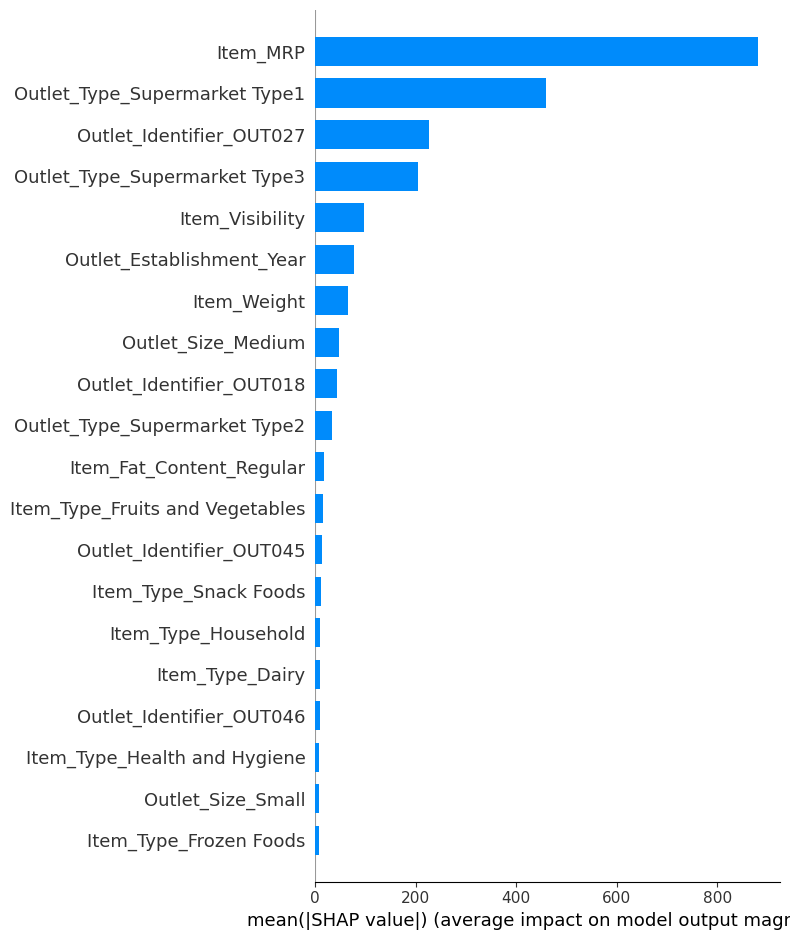

In [13]:
shap.summary_plot(shap_values,features= X_shap, plot_type='bar', show=False) # add show=False to prevent from show the plot and save beforehand
fig_gcf = plt.gcf()
fig_gcf.savefig('rf_shap_bar.png')

![](rf_top5.png)

4 of the top 5 Features are the same in both but are ranked differently. Item_MRP is the most important in both.

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


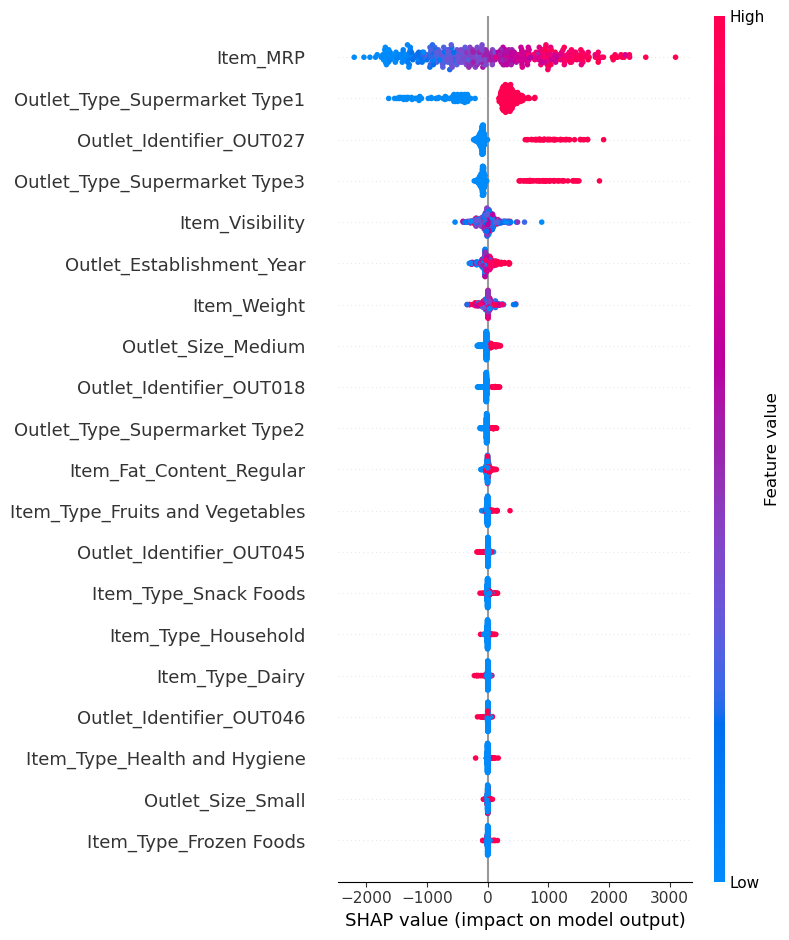

In [14]:
shap.summary_plot(shap_values,features= X_shap, show=False) # add show=False to prevent from show the plot and save beforehand
fig_gcf = plt.gcf()
fig_gcf.savefig('rf_shap_dot.png')

The top 3 most import features are:
- Item MRP
- Supermarket Type 1
- Outlet 27



A higher MRP lead to more sales and Items sold more in Type 1 and Outlet 27

# Local Explanations

In [15]:
len(X_shap)

400

In [16]:
X_shap_local = X_shap.reset_index(drop=True)
y_shap_local = y_shap.reset_index(drop=True)

In [17]:
## Getting the shap values wth the local X_shap 
shap_values = explainer(X_shap_local,y_shap_local)

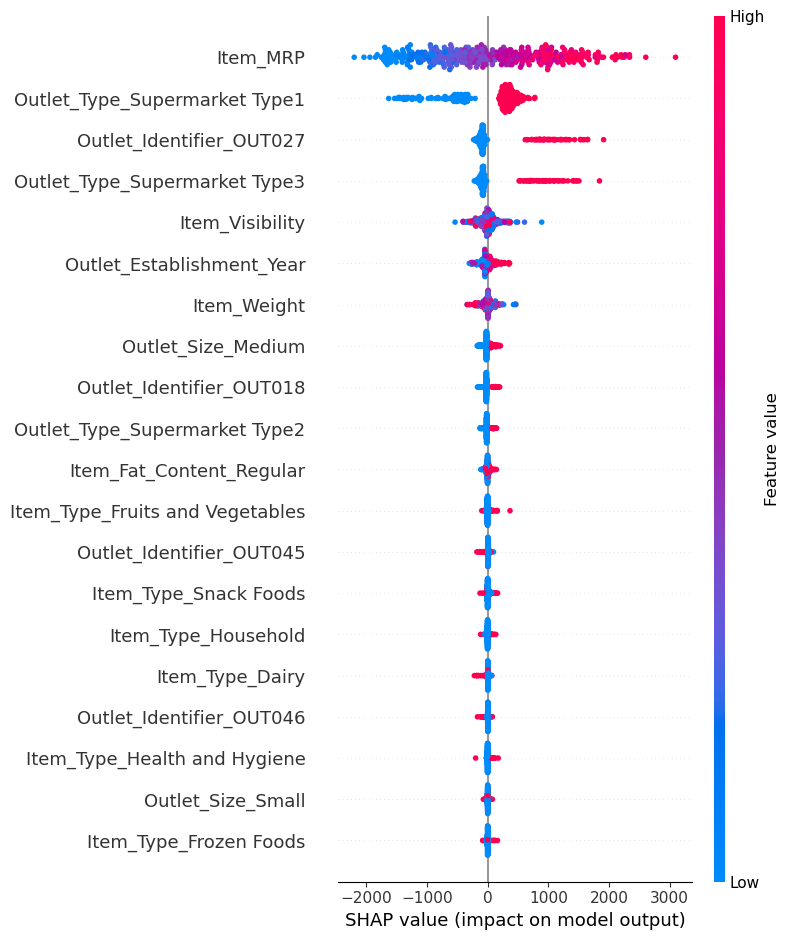

In [18]:
shap.summary_plot(shap_values,X_shap_local)

In [19]:
y_shap_local

0       759.0120
1       663.1368
2      2766.3990
3      1225.0720
4      1685.8056
         ...    
395    1379.5376
396    2956.1520
397    1259.6936
398    4206.5244
399     605.8780
Name: Item_Outlet_Sales, Length: 400, dtype: float64

In [137]:
X_shap_local.head()

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
0        15.85         0.110653   36.9506                     2007.0   
1        15.10         0.087407  221.8456                     1997.0   
2        17.50         0.015592  184.8266                     2002.0   
3        10.80         0.049820  243.2144                     2002.0   
4        15.00         0.044999  140.4838                     2002.0   

   Item_Fat_Content_Regular  Item_Type_Breads  Item_Type_Breakfast  \
0                       1.0               0.0                  0.0   
1                       1.0               0.0                  0.0   
2                       0.0               0.0                  0.0   
3                       0.0               0.0                  0.0   
4                       0.0               0.0                  0.0   

   Item_Type_Canned  Item_Type_Dairy  Item_Type_Frozen Foods  \
0               0.0              0.0                     1.0   
1               0.0              0.0                     0.0   
2               0.0              0.0                     0.0   
3               0.0              0.0                     0.0   
4               0.0              0.0                     0.0   

   Item_Type_Fruits and Vegetables  Item_Type_Hard Drinks  \
0                              0.0                    0.0   
1                              1.0                    0.0   
2                              1.0                    0.0   
3                              1.0                    0.0   
4                              0.0                    0.0   

   Item_Type_Health and Hygiene  Item_Type_Household  Item_Type_Meat  \
0                           0.0                  0.0             0.0   
1                           0.0                  0.0             0.0   
2                           0.0                  0.0             0.0   
3                           0.0                  0.0             0.0   
4                           1.0                  0.0             0.0   

   Item_Type_Others  Item_Type_Seafood  Item_Type_Snack Foods  \
0               0.0                0.0                    0.0   
1               0.0                0.0                    0.0   
2               0.0                0.0                    0.0   
3               0.0                0.0                    0.0   
4               0.0                0.0                    0.0   

   Item_Type_Soft Drinks  Item_Type_Starchy Foods  Outlet_Identifier_OUT013  \
0                    0.0                      0.0                       0.0   
1                    0.0                      0.0                       0.0   
2                    0.0                      0.0                       0.0   
3                    0.0                      0.0                       0.0   
4                    0.0                      0.0                       0.0   

   Outlet_Identifier_OUT017  Outlet_Identifier_OUT018  \
0                       1.0                       0.0   
1                       0.0                       0.0   
2                       0.0                       0.0   
3                       0.0                       0.0   
4                       0.0                       0.0   

   Outlet_Identifier_OUT019  Outlet_Identifier_OUT027  \
0                       0.0                       0.0   
1                       0.0                       0.0   
2                       0.0                       0.0   
3                       0.0                       0.0   
4                       0.0                       0.0   

   Outlet_Identifier_OUT035  Outlet_Identifier_OUT045  \
0                       0.0                       0.0   
1                       0.0                       0.0   
2                       0.0                       1.0   
3                       0.0                       1.0   
4                       0.0                       1.0   

   Outlet_Identifier_OUT046  Outlet_Identifier_OUT049  Outlet_Size_Me

In [33]:
for column in X_shap_local.columns:
    if column.startswith('Outlet_Identifier_OUT'):
        # Create the mask for the current column
        mask = X_shap_local[column] == True
        
        # Get the matching indices in y_shap
        matching_indices = y_shap.index[mask]
        
        # Calculate the sum of target values
        target_sum = y_shap.loc[matching_indices].sum()
        
        # Print the target sum
        print(column, target_sum)

Outlet_Identifier_OUT013 121890.00339999999
Outlet_Identifier_OUT017 145917.3938
Outlet_Identifier_OUT018 69864.39140000001
Outlet_Identifier_OUT019 9016.263599999998
Outlet_Identifier_OUT027 203003.0858
Outlet_Identifier_OUT035 91953.638
Outlet_Identifier_OUT045 83111.814
Outlet_Identifier_OUT046 111574.764
Outlet_Identifier_OUT049 111849.0736


Outlet with the highest sales: Outlet 27

Outlet with the lowest sales: Outlet 19

Will pick an example for each outlet.

In [32]:
for column in X_shap_local.columns:
    if column.startswith('Outlet_Type_Supermarket'):
        # Create the mask for the current column
        mask = X_shap_local[column] == True
        
        # Get the matching indices in y_shap
        matching_indices = y_shap.index[mask]
        
        # Calculate the sum of target values
        target_sum = y_shap.loc[matching_indices].sum()
        
        # Print the target sum
        print(column, target_sum)

Outlet_Type_Supermarket Type1 666296.6868
Outlet_Type_Supermarket Type2 69864.39140000001
Outlet_Type_Supermarket Type3 203003.0858


Supermarket Type 1 and 3 had the highest sales and were in the top 4 influences

## High-selling Outlet Example

In [38]:
# Get the indices of the column 'Outlet_Ientifier_OUT027'
high_outlet_indices = X_shap_local['Outlet_Identifier_OUT027'] == True

# Select a random entry from the column
random_high_index = np.random.choice(X_shap_local.index[high_outlet_indices])

print("Random Entry:",random_high_index) #entry is 224

Random Entry: 224


In [39]:
high_sample =  X_shap_local.loc[random_high_index]
high_sample

Item_Weight                          12.904458
Item_Visibility                       0.069815
Item_MRP                            214.385000
Outlet_Establishment_Year          1985.000000
Item_Fat_Content_Regular              0.000000
Item_Type_Breads                      0.000000
Item_Type_Breakfast                   0.000000
Item_Type_Canned                      0.000000
Item_Type_Dairy                       1.000000
Item_Type_Frozen Foods                0.000000
Item_Type_Fruits and Vegetables       0.000000
Item_Type_Hard Drinks                 0.000000
Item_Type_Health and Hygiene          0.000000
Item_Type_Household                   0.000000
Item_Type_Meat                        0.000000
Item_Type_Others                      0.000000
Item_Type_Seafood                     0.000000
Item_Type_Snack Foods                 0.000000
Item_Type_Soft Drinks                 0.000000
Item_Type_Starchy Foods               0.000000
Outlet_Identifier_OUT013              0.000000
Outlet_Identi

In [40]:
y_shap_local[random_high_index]

4327.7

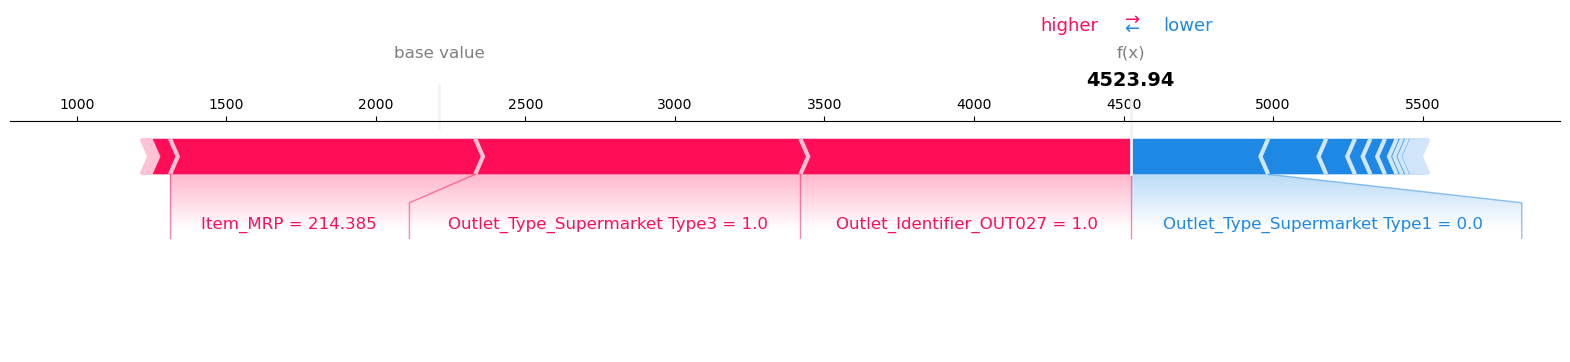

In [140]:
shap.force_plot(explainer.expected_value,
                shap_values=shap_values[random_high_index].values,
               features=X_shap_local.iloc[random_high_index], matplotlib=True, show=False)
fig = plt.gcf()
fig.savefig('high_forceplot.png', bbox_inches='tight')
fig

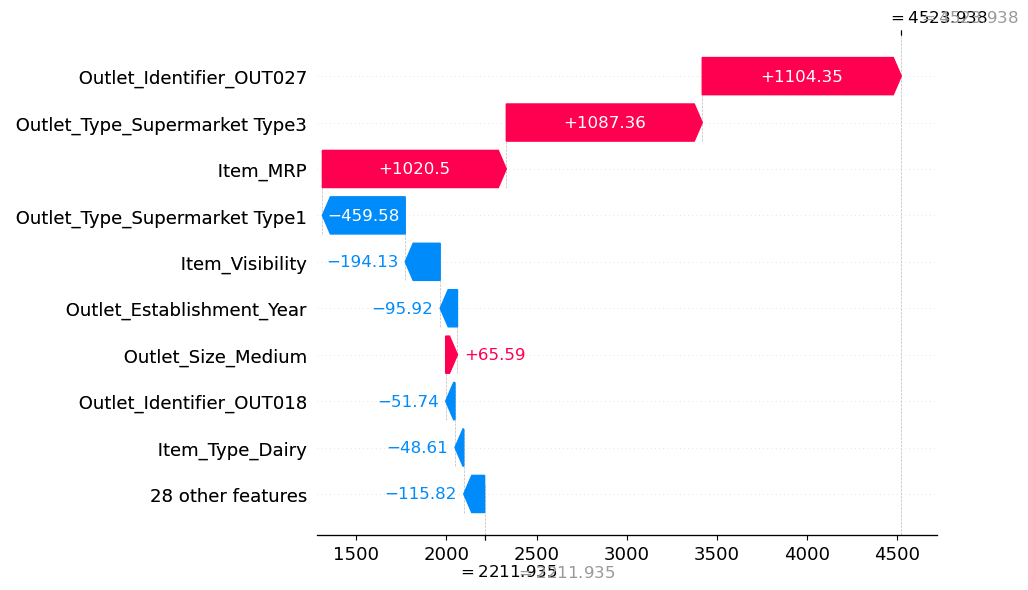

In [108]:
shap.plots._waterfall.waterfall_legacy(explainer.expected_value[0],
                shap_values=shap_values[random_high_index].values,
               features=X_shap_local.iloc[random_high_index],
                                       show=False)

fig = plt.gcf()
fig.savefig('high_waterfall.png', bbox_inches='tight')
fig

In this example, being in outlet 27, being in a Type 3 outlet and having a high MRP were the greatest influences for having high sales for this item.

## Low-selling Outlet Example

In [118]:
# Get the indices of the column 'Outlet_Ientifier_OUT027'
low_outlet_indices = X_shap_local['Outlet_Identifier_OUT019'] == True

# Select a random entry from the column
random_low_index = np.random.choice(X_shap_local.index[low_outlet_indices])

print("Random Entry:",random_low_index) # entry is 40

Random Entry: 40


In [119]:
low_item =  X_shap_local.loc[random_low_index]
low_item

Item_Weight                          12.904458
Item_Visibility                       0.116929
Item_MRP                            183.329200
Outlet_Establishment_Year          1985.000000
Item_Fat_Content_Regular              0.000000
Item_Type_Breads                      0.000000
Item_Type_Breakfast                   0.000000
Item_Type_Canned                      0.000000
Item_Type_Dairy                       0.000000
Item_Type_Frozen Foods                1.000000
Item_Type_Fruits and Vegetables       0.000000
Item_Type_Hard Drinks                 0.000000
Item_Type_Health and Hygiene          0.000000
Item_Type_Household                   0.000000
Item_Type_Meat                        0.000000
Item_Type_Others                      0.000000
Item_Type_Seafood                     0.000000
Item_Type_Snack Foods                 0.000000
Item_Type_Soft Drinks                 0.000000
Item_Type_Starchy Foods               0.000000
Outlet_Identifier_OUT013              0.000000
Outlet_Identi

In [120]:
y_shap_local[random_low_index]

364.8584

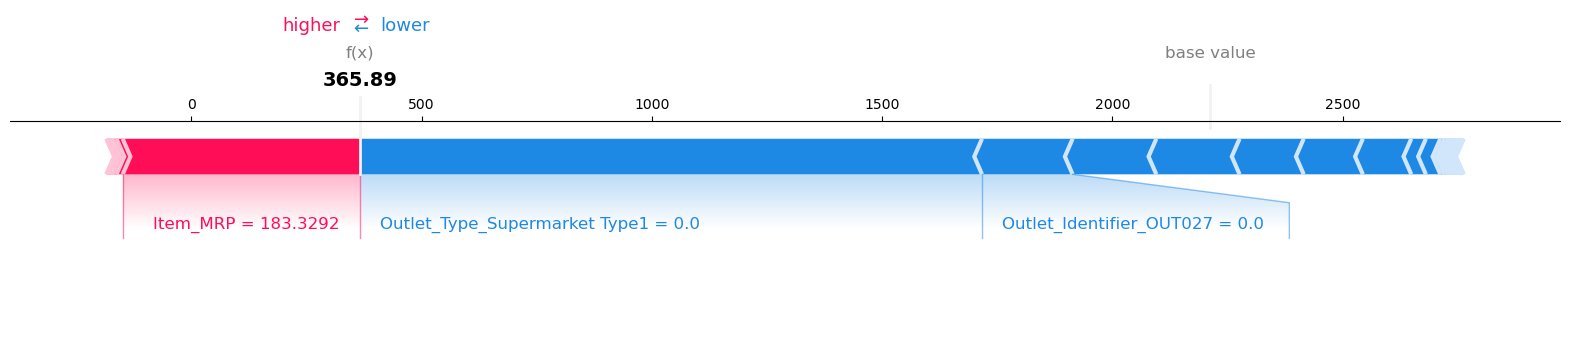

In [121]:
shap.force_plot(explainer.expected_value,
                shap_values=shap_values[random_low_index].values,
               features=X_shap_local.iloc[random_low_index], matplotlib=True, show=False)
fig = plt.gcf()
fig.savefig('low_forceplot.png', bbox_inches='tight')
fig

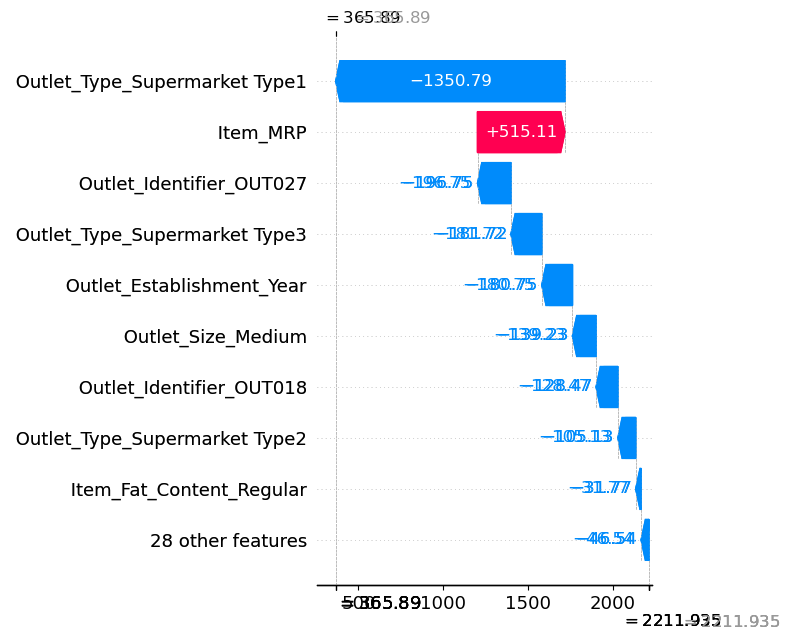

In [136]:
shap.plots._waterfall.waterfall_legacy(explainer.expected_value[0],
                shap_values=shap_values[random_low_index].values,
               features=X_shap_local.iloc[random_low_index],
                                       show=False)
fig = plt.gcf()
fig.tight_layout()
fig.savefig('low_waterfall.png')
fig

In the Low-selling Outlet Example,the item MRP helped influence the sales but not enough to compensate for it  not being in outlet 27, and not being in either a type 1 or type 3 supermarket

## LIME

In [141]:
lime_explainer =LimeTabularExplainer(training_data=X_shap.values, feature_names=X_shap.columns, mode='regression')
lime_explainer

In [148]:
exp = lime_explainer.explain_instance(X_shap.iloc[random_high_index],
                               rf.predict)
fig = plt.gcf()
fig.savefig('high_LIME.png', bbox_inches='tight')

exp.show_in_notebook()

X does not have valid feature names, but RandomForestRegressor was fitted with feature names


In [149]:
exp = lime_explainer.explain_instance(X_shap.iloc[random_low_index],
                               rf.predict)
fig = plt.gcf()
fig.savefig('low_LIME.png', bbox_inches='tight')

exp.show_in_notebook()

X does not have valid feature names, but RandomForestRegressor was fitted with feature names
